<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/ALAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection

Cloning into 'Adversarially-Learned-Anomaly-Detection'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (359/359), done.
remote: Total 527 (delta 224), reused 241 (delta 71), pack-reused 66
Receiving objects: 100% (527/527), 37.46 MiB | 25.99 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [3]:
cd /content/Adversarially-Learned-Anomaly-Detection/alad

/content/Adversarially-Learned-Anomaly-Detection/alad


In [4]:
ls

ALAD_Arrythmia.ipynb  arrhythmia_utilities.py  __pycache__/  svhn_utilities.py
ALAD_cifar10.ipynb    cifar10_utilities.py     results/
ALAD.ipynb            kdd_utilities.py         run.py


In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [8]:
!python run.py

Instructions for updating:
non-resource variables are not supported in the long term
Size of split train : 226
Size of split test : 113
(113,)
ALAD is training with the following parameters:
Batch size:  32
Starting learning rate:  1e-05
EMA Decay:  0.999
Degree for L norms:  2
Anomalous label:  1
Score method:  
Discriminator zz enabled:  True
Spectral Norm enabled:  False
Traceback (most recent call last):
  File "run.py", line 642, in <module>
    , enable_early_stop=True, do_spectral_norm=False)
  File "run.py", line 133, in train_and_test
    rankdir='TB', show_shapes = True, expand_nested = True)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/utils/vis_utils.py", line 283, in plot_model
    dpi=dpi)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/utils/vis_utils.py", line 129, in model_to_dot
    if not model._is_graph_network:
AttributeError: 'function' object has no attribute '_is_graph_network'


# **Draw Dxxzz Network**

In [1]:
%tensorflow_version 2.x

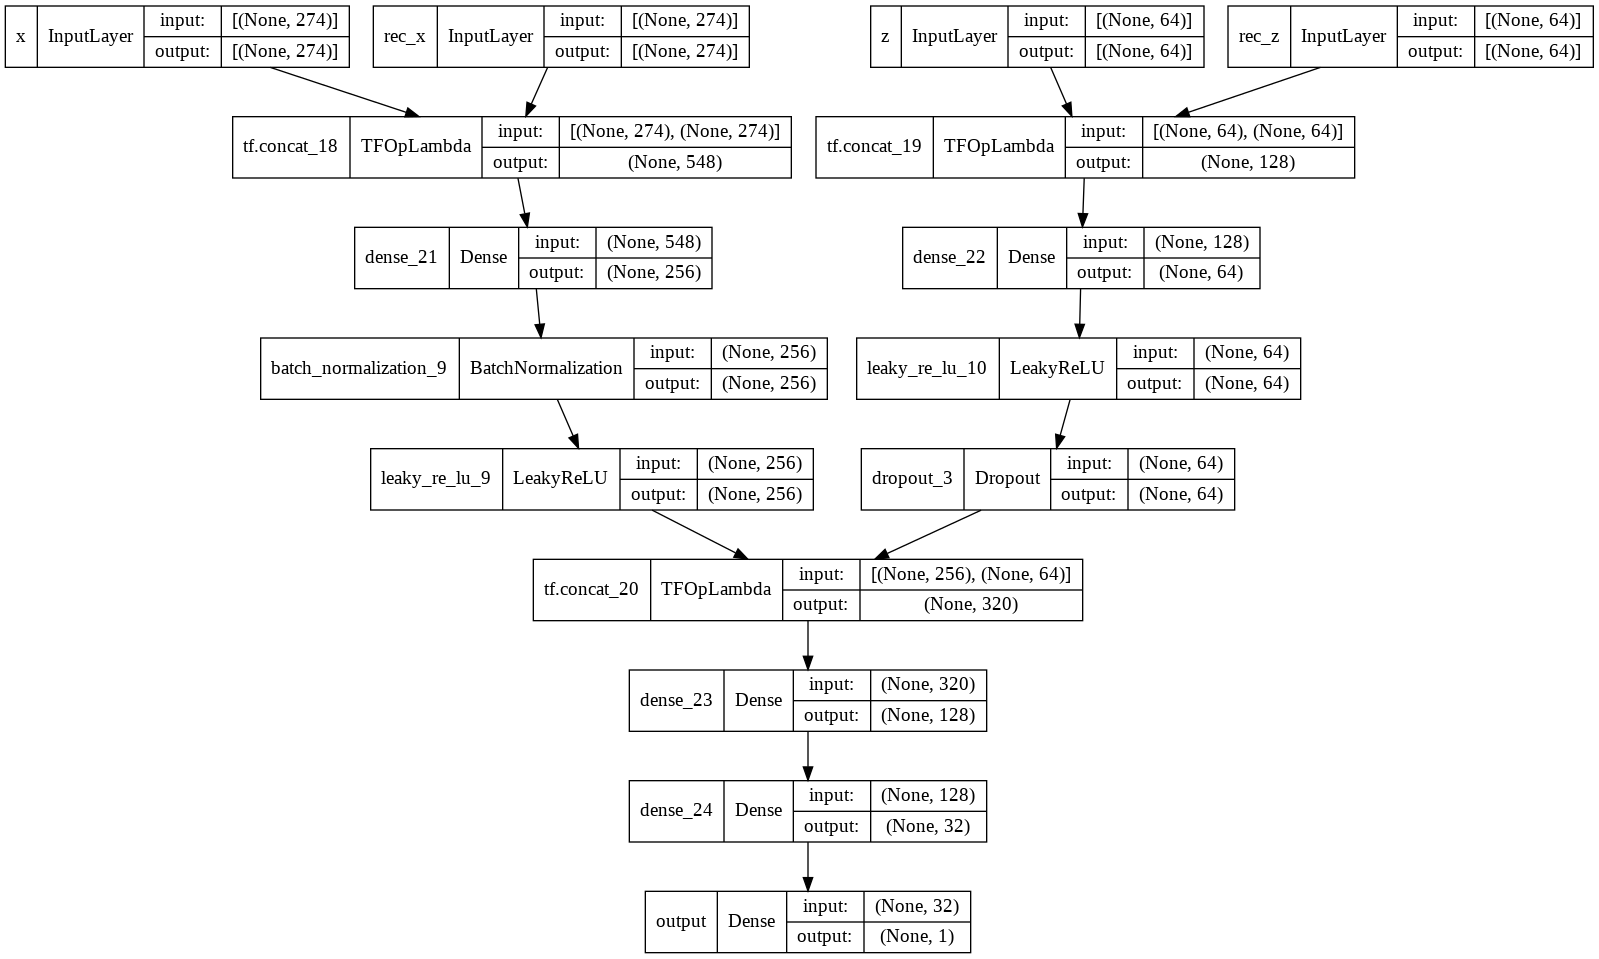

In [10]:

import tensorflow as tf

x = tf.keras.Input(shape=(274,), dtype='int32', name='x')
rec_x = tf.keras.Input(shape=(274,), dtype='int32', name='rec_x')
z = tf.keras.Input(shape=(64,), dtype='int32', name='z')
rec_z = tf.keras.Input(shape=(64,), dtype='int32', name='rec_z')

concat_x = tf.concat([x, rec_x], axis=1)
x1 = tf.keras.layers.Dense(256)(concat_x)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.LeakyReLU()(x1)

concat_z = tf.concat([z, rec_z], axis=1)
z1 = tf.keras.layers.Dense(64)(concat_z)
z1 = tf.keras.layers.LeakyReLU()(z1)
z1 = tf.keras.layers.Dropout(0.5)(z1)

y = tf.concat([x1, z1], axis=1)
y = tf.keras.layers.Dense(128, activation='relu')(y)
y = tf.keras.layers.Dense(32, activation='relu')(y)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(y)

model = tf.keras.Model(inputs=[x,rec_x,z,rec_z], outputs=[output])

tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None, show_layer_activations=False)